In [1]:

#Data Description

#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals      

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
#Columns registered and casual are not present in the test data set. 
# We can safely drop those columns
train.drop(columns=['casual', 'registered'], inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


<b>Check Quality of data</b>

In [7]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [8]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [9]:
train['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
train['holiday'].unique()

array([0, 1], dtype=int64)

In [11]:
train['workingday'].unique()

array([0, 1], dtype=int64)

In [12]:
train['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
train[train['temp'] <= 0.0].shape

(0, 10)

In [14]:
train[train['atemp'] <= 0.0].shape

(0, 10)

In [15]:
train[train['humidity'] <= 0.0].shape

(22, 10)

In [16]:
train[train['windspeed'] <= 0.0].shape

(1313, 10)

In [17]:
train.shape

(10886, 10)

<b>Data Visualization</b>

In [18]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [19]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object

In [20]:
#Do a bit of feature engineering to split date into year month day and time
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
#Not including seconds as it may not have an impact on the final result

In [21]:
train.drop(columns=['datetime'], inplace=True)

In [22]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0


In [23]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
categorical_columns = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'date', 'hour', 'minute']

0.003690844422472008


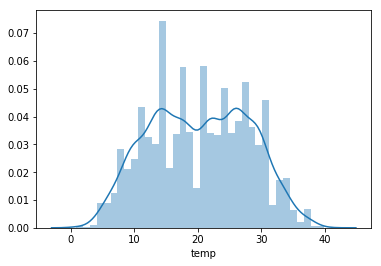

In [24]:
sns.distplot(train['temp'])
print(train['temp'].skew())

Values in temp column doesn't seem to have a significant skew

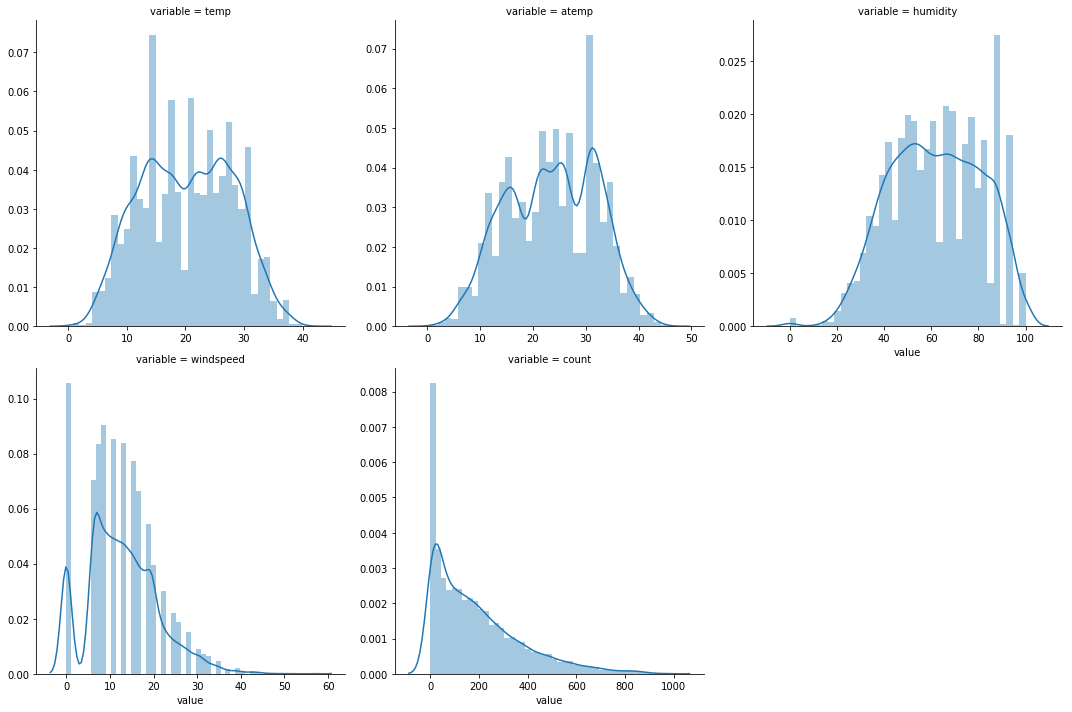

In [25]:
f = pd.melt(train, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

In [26]:
print(train.temp.skew(), train.atemp.skew(), train.humidity.skew())

0.003690844422472008 -0.10255951346908665 -0.08633518364548581


In [27]:
train.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [31]:
#Very low skew values and any transformations may not help much
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#ct = ColumnTransformer([('ct1', StandardScaler(), ['count'])], remainder='passthrough')
#train['count'] = scaler.fit_transform(train)
#train.head()

In [32]:
#fig,axes = plt.subplots(ncols=2,nrows=2)
#fig.set_size_inches(12, 10)
#sns.distplot(train["count"],ax=axes[0][0])
#stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
#sns.distplot(np.log(train["count"]),ax=axes[1][0])
#stats.probplot(np.log(train["count"]), dist='norm', fit=True, plot=axes[1][1])

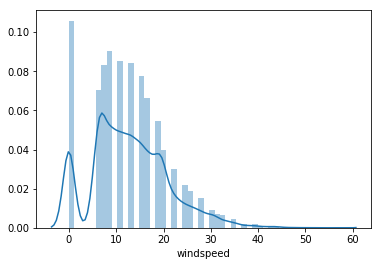

In [28]:
sns.distplot(train['windspeed'])

In [29]:
train['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [30]:
#Bucketize the windspeed column (decision taken based on how the distplot looks, not so continuous)
train['windspeed'] = pd.cut(train['windspeed'], 3, labels=['low', 'medium', 'high'])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,14.395,81,low,16,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,low,40,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,low,32,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,low,13,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,low,1,2011,1,1,4,0


1.2420662117180776

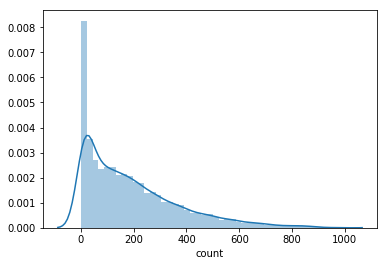

In [31]:
sns.distplot(train['count'])
train['count'].skew()

-0.11288161967729908

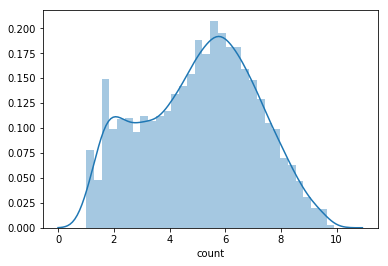

In [34]:
sns.distplot(np.cbrt(train['count']))
np.cbrt(train['count']).skew()

In [35]:
#Update count values
train['count'] = np.cbrt(train['count'])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,14.395,81,low,2.519842,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,low,3.419952,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,low,3.174802,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,low,2.351335,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,low,1.000000,2011,1,1,4,0


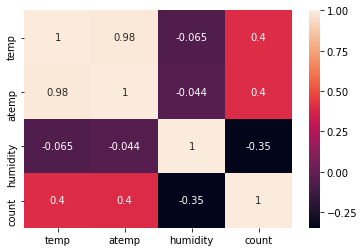

In [36]:
corr = train[numeric_columns].corr()
sns.heatmap(corr, annot=True)

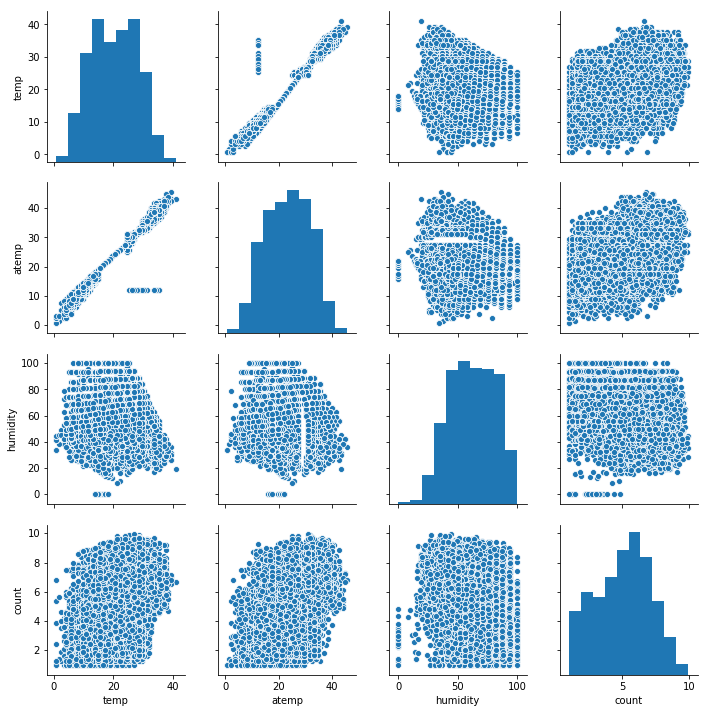

In [37]:
sns.pairplot(train[numeric_columns])

In [38]:
#As temp and atemp are almost perfectly correlated, we can drop one of the columns
#Also, note that the temp and humidity are negatively correlated
train.drop(columns=['atemp'], inplace=True)
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,date,hour,minute
0,1,0,0,1,9.84,81,low,2.519842,2011,1,1,0,0
1,1,0,0,1,9.02,80,low,3.419952,2011,1,1,1,0
2,1,0,0,1,9.02,80,low,3.174802,2011,1,1,2,0
3,1,0,0,1,9.84,75,low,2.351335,2011,1,1,3,0
4,1,0,0,1,9.84,75,low,1.000000,2011,1,1,4,0


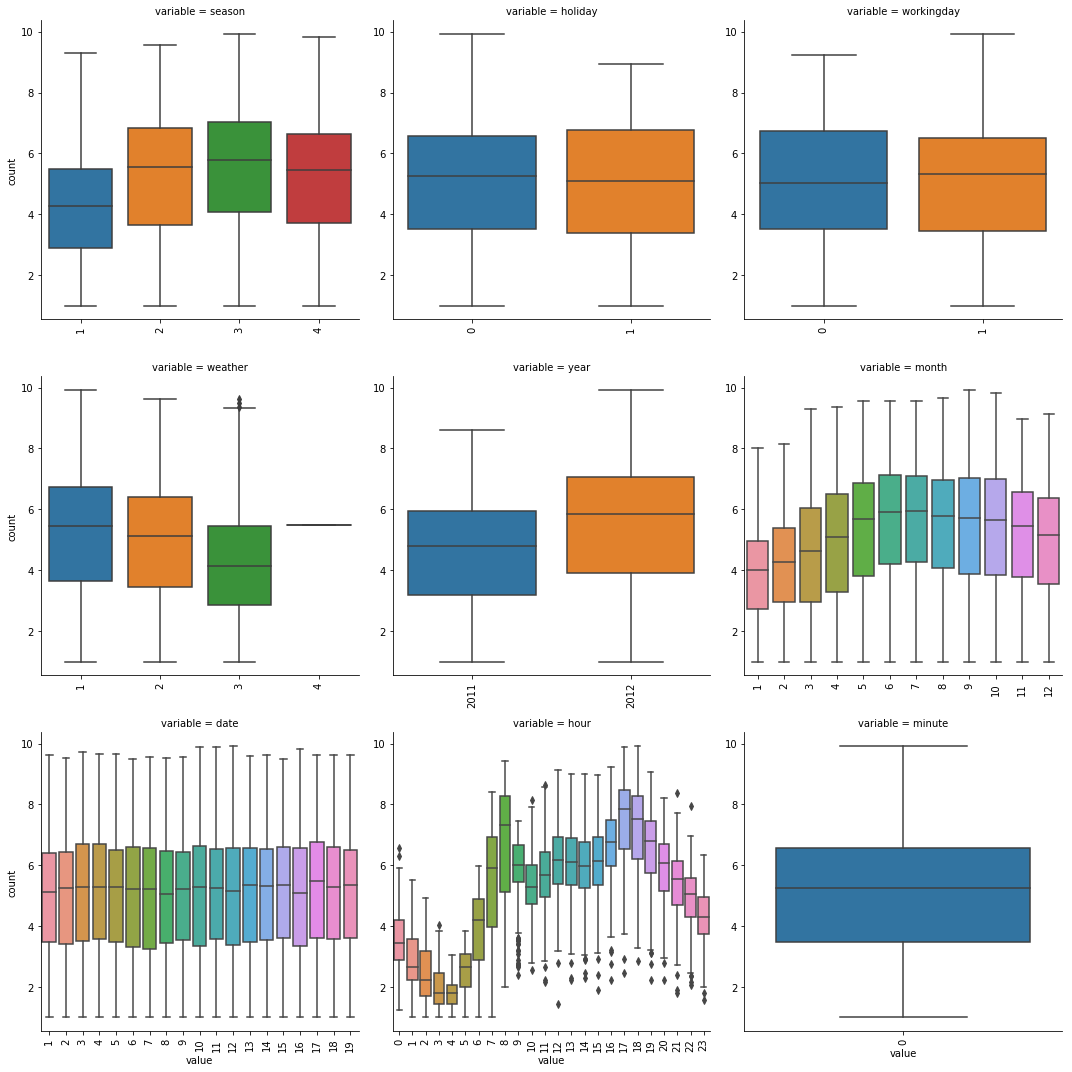

In [39]:
#Categorical variables vs target variable
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['count'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g.map(boxplot, "value", "count")

In [40]:
train['minute'].describe()

count    10886.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: minute, dtype: float64

In [41]:
train.drop(columns=['minute', 'year'], inplace=True)
categorical_columns.remove('minute')
categorical_columns.remove('year')

In [42]:
train.loc[(train['holiday']==0) & (train['workingday']==0)].shape

(3163, 11)

In [43]:
train.loc[(train['holiday']==0) & (train['workingday']==1)].shape

(7412, 11)

In [44]:
train.loc[(train['holiday']==1) & (train['workingday']==0)].shape

(311, 11)

In [45]:
train.loc[(train['holiday']==1) & (train['workingday']==1)].shape

(0, 11)

In [46]:
train.dtypes

season           int64
holiday          int64
workingday       int64
weather          int64
temp           float64
humidity         int64
windspeed     category
count          float64
month            int64
date             int64
hour             int64
dtype: object

In [47]:
for col in categorical_columns:
    train[col] = train[col].astype('category')

In [48]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed     category
count          float64
month         category
date          category
hour          category
dtype: object

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['temp', 'humidity']] = scaler.fit_transform(train[['temp', 'humidity']])
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,date,hour
0,1,0,0,1,-1.333661,0.993213,low,2.519842,1,1,0
1,1,0,0,1,-1.438907,0.941249,low,3.419952,1,1,1
2,1,0,0,1,-1.438907,0.941249,low,3.174802,1,1,2
3,1,0,0,1,-1.333661,0.681430,low,2.351335,1,1,3
4,1,0,0,1,-1.333661,0.681430,low,1.000000,1,1,4


In [50]:
train=pd.get_dummies(train, columns=['season', 'weather', 'windspeed'])
train.head()

,holiday,workingday,temp,humidity,count,month,date,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,windspeed_low,windspeed_medium,windspeed_high
0,0,0,-1.333661,0.993213,2.519842,1,1,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,-1.438907,0.941249,3.419952,1,1,1,1,0,0,0,1,0,0,0,1,0,0
2,0,0,-1.438907,0.941249,3.174802,1,1,2,1,0,0,0,1,0,0,0,1,0,0
3,0,0,-1.333661,0.681430,2.351335,1,1,3,1,0,0,0,1,0,0,0,1,0,0
4,0,0,-1.333661,0.681430,1.000000,1,1,4,1,0,0,0,1,0,0,0,1,0,0


In [51]:
targets = train['count']
train.drop(columns=['count'], inplace=True)

In [52]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(7620, 18)
(3266, 18)


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.46542738297352104

In [55]:
print(X_train.shape)
print(y_train.shape)

(7620, 18)
(7620,)


In [57]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
r2_score(y_test, y_pred)

0.47011342026250946

In [56]:
#conda install -c districtdatalabs yellowbrick

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


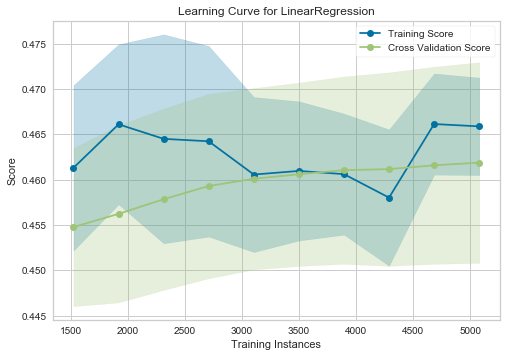

In [59]:
#Let us verify that with the learning curve
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(lr, train_sizes=sizes, scoring='r2')
viz.fit(X_train, y_train)
viz.poof()

<b>This model is suffering from high bias problem</b>

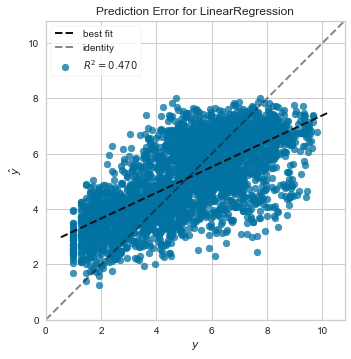

In [60]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

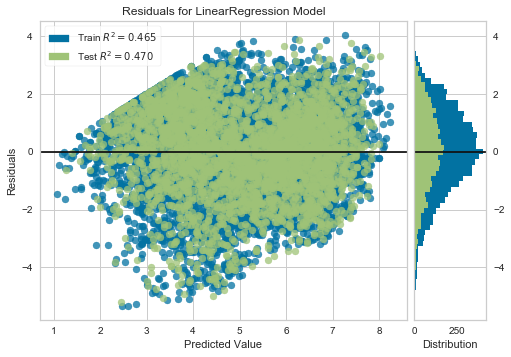

In [61]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

<!--https://www.scikit-yb.org/en/latest/api/regressor/residuals.html?highlight=residual%20plot-->
If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, 
a non-linear model is more appropriate. 
In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. 
This seems to indicate that our linear model is performing well. 
We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

As we have high bias problem, possible actions to try out are
<ul>
<li>Train longer</li>
<li>Add polynomial features</li>
<li>Add more features</li>
<li>Decrease regularization</li>
<li>Choose different hyperparameters</li>
<li>A different model</li>
</ul>

In [62]:
#Try different degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
polyDf = polynomial_features.fit_transform(X_train)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly2 = LinearRegression()
lrPoly2.fit(polyDf, y_train)
lrPoly2.score(polyDf, y_train)
#polyDf

0.6283135497635842

In [63]:
polyDfTest = polynomial_features.fit_transform(X_test)
y_pred = lrPoly2.predict(polyDfTest)
r2_score(y_test, y_pred)

0.6228553429657082

It seems the score is improving when we are increasing the complexity by using polynomials of degree 2

In [64]:
#Try different degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
polyDf = polynomial_features.fit_transform(X_train)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly3 = LinearRegression()
lrPoly3.fit(polyDf, y_train)
lrPoly3.score(polyDf, y_train)
#polyDf

0.7129268917418676

In [65]:
polyDfTest = polynomial_features.fit_transform(X_test)
y_pred = lrPoly3.predict(polyDfTest)
r2_score(y_test, y_pred)

-51.70563296115397

A negative score indicates that the model is performing worse. So, polynomial of degree 3 is not working well.

Let us try to see if we can add more features

In [66]:
#Current set of features
train.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'month', 'date', 'hour',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'windspeed_low',
       'windspeed_medium', 'windspeed_high'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\st

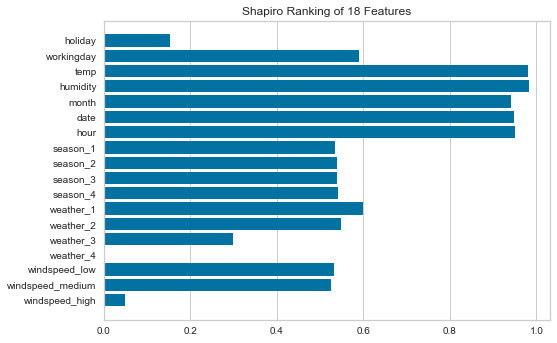

In [67]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=X_train.columns, algorithm='shapiro')
visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.poof()                       # Draw/show/poof the data